In [13]:
import urllib.request
import json
import numpy as np
import pandas as pd

In [14]:
data_url1 = 'data/processed_data/picked_TS_5k_14k.json'
TS_pick = pd.read_json(data_url1)
data_url2 = 'data/processed_data/picked_8k_30k.json'
IC_pick = pd.read_json(data_url2)

In [15]:
IC_pick_sample = IC_pick.sample(n=15000).reset_index()

In [16]:
deck_state = TS_pick.deck.tolist() + IC_pick_sample.deck.tolist()

In [17]:
len(deck_state)

29413

In [18]:
def upgrade_lst(lst):
  new_lst = list()
  for item in lst:
    if(item != 'Searing Blow'):
      new_lst.append(item+'+1')
  return new_lst

In [19]:
def get_ALL_IC_CARD():
  IC_ATTACK_CARDS = ["Strike_R", "Bash", "Anger", "Body Slam", "Clash", "Cleave", "Clothesline", "Headbutt", "Heavy Blade", "Iron Wave", "Perfected Strike", "Pommel Strike", "Sword Boomerang", "Thunderclap", "Twin Strike", "Wild Strike", "Blood for Blood", "Carnage", "Dropkick", "Hemokinesis", "Pummel", "Rampage", "Reckless Charge", "Searing Blow", "Sever Soul", "Uppercut", "Whirlwind", "Bludgeon", "Feed", "Fiend Fire", "Immolate", "Reaper"]
  IC_SKILL_CARDS = ["Defend_R", "Armaments", "Flex", "Havoc", "Shrug It Off", "True Grit", "Warcry", "Battle Trance", "Bloodletting", "Burning Pact", "Disarm", "Dual Wield", "Entrench", "Flame Barrier", "Ghostly Armor", "Infernal Blade", "Intimidate", "Power Through", "Rage", "Second Wind", "Seeing Red", "Sentinel", "Shockwave", "Spot Weakness", "Double Tap", "Exhume", "Impervious", "Limit Break", "Offering"]
  IC_POWER_CARDS = ["Combust", "Dark Embrace", "Evolve", "Feel No Pain", "Fire Breathing", "Inflame", "Metallicize", "Rupture", "Barricade", "Berserk", "Brutality", "Corruption", "Demon Form", "Juggernaut"]
  IRONCLAD_CARDS = IC_ATTACK_CARDS + IC_SKILL_CARDS + IC_POWER_CARDS
  return IRONCLAD_CARDS + upgrade_lst(IRONCLAD_CARDS)

In [20]:
def get_ALL_COLORLESS_CARD():
    COLORLESS_CARDS = ["Dramatic Entrance", "Flash of Steel", "Mind Blast", "Swift Strike", "HandOfGreed", "Bite", "Expunger", "Ritual Dagger", "Shiv", "Smite", "Through Violence", "Bandage Up", "Blind", "Dark Shackles", "Deep Breath", "Discovery", "Enlightenment", "Finesse", "Forethought", "Good Instincts", "Impatience", "Jack Of All Trades", "Madness", "Panacea", "PanicButton", "Purity", "Trip", "Apotheosis", "Chrysalis", "Master of Strategy", "Metamorphosis", "Secret Technique", "Secret Weapon", "The Bomb", "Thinking Ahead", "Transmutation", "Violence", "Apparition", "Beta", "Insight", "J.A.X.", "Miracle", "Safety", "Magnetism", "Mayhem", "Panache", "Sadistic Nature"]
    CURSE_CARDS = ["AscendersBane", "Clumsy", "Curse of the Bell", "Decay", "Doubt", "Injury", "Necronomicurse", "Normality", "Pain", "Parasite", "Pride", "Regret", "Shame", "Writhe"]
    NOISE = ['Expunger', 'Ritual Dagger', 'Shiv', 'Smite', 'Through Violence',
       'Apparition', 'Beta', 'Insight', 'Miracle', 'Safety',
       'Curse of the Bell', 'Pride', 'Expunger+1', 'Ritual Dagger+1', 'Shiv+1',
       'Smite+1', 'Through Violence+1', 'Apparition+1', 'Beta+1', 'Insight+1',
       'Miracle+1', 'Safety+1']
    cards = COLORLESS_CARDS + upgrade_lst(COLORLESS_CARDS) + CURSE_CARDS 
    return [card for card in cards if card not in NOISE] 

In [21]:
def get_ALL_TS_CARD():
    TS_ALL_CARD =[ 	
        "Strike_G" , "Defend_G" ,"Neutralize" , "Survivor",
        "Bane", "Dagger Spray", "Dagger Throw", "Flying Knee", "Poisoned Stab", "Quick Slash", "Slice", "Sneaky Strike", "Sucker Punch",
        "All Out Attack", "Backstab", "Choke", "Dash", "Endless Agony", "Eviscerate", "Finisher", "Flechettes", "Heel Hook", "Masterful Stab", "Predator", "Riddle with Holes", "Skewer",
        "Die Die Die", "Glass Knife", "Grand Finale", "Unload",
        "Acrobatics", "Backflip", "Blade Dance", "Cloak And Dagger", "Deadly Poison", "Deflect", "Dodge and Roll", "Outmaneuver", "PiercingWail", "Prepared",
        "Blur", "Bouncing Flask", "Calculated Gamble", "Catalyst", "Concentrate", "Crippling Cloud", "Distraction", "Escape Plan", "Expertise", "Leg Sweep", "Reflex", "Setup", "Tactician", "Terror",
        "Adrenaline", "Alchemize", "Bullet Time", "Burst", "Corpse Explosion", "Doppelganger", "Malaise", "Nightmare", "Phantasmal Killer", "Storm of Steel",
        "Accuracy", "Caltrops", "Footwork", "Infinite Blades", "Noxious Fumes", "Well Laid Plans",
        "A Thousand Cuts", "After Image", "Envenom", "Tools of the Trade", "Wraith Form v2" ,
        "Underhanded Strike", 'Crippling Poison' , 'Venomology' , 'Night Terror' ## beta name
    ]
    return TS_ALL_CARD + upgrade_lst(TS_ALL_CARD)

In [22]:
def get_ALL_CARD():
    NOISE = ['Sneaky Strike', 'Riddle with Holes',
       'Cloak and Dagger', 'Crippling Cloud', 'Alchemize',
       'Nightmare', 'Sneaky Strike+1',
        'Riddle with Holes+1', 'Cloak and Dagger+1',
        'Crippling Cloud+1', 'Alchemize+1', 'Nightmare+1',
        'Wraith Form v2+1','Underhanded Strike+1','Venomology+1','Night Terror+1'
        ]
    allCard = get_ALL_IC_CARD() + get_ALL_COLORLESS_CARD() + get_ALL_TS_CARD()
    return [card for card in allCard if card not in NOISE] 

In [23]:
vocab = get_ALL_CARD()
len(vocab)

379

In [24]:
print(len(get_ALL_IC_CARD()))
print(len(get_ALL_COLORLESS_CARD()))
print(len(get_ALL_TS_CARD()))

149
86
158


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [26]:
def custom_analyzer(doc):
    return doc
    
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocab, analyzer=custom_analyzer,lowercase=False)
tfidf_vectorizer.fit(deck_state)

TfidfVectorizer(analyzer=<function custom_analyzer at 0x0000016E46802940>,
                lowercase=False,
                vocabulary=['Strike_R', 'Bash', 'Anger', 'Body Slam', 'Clash',
                            'Cleave', 'Clothesline', 'Headbutt', 'Heavy Blade',
                            'Iron Wave', 'Perfected Strike', 'Pommel Strike',
                            'Sword Boomerang', 'Thunderclap', 'Twin Strike',
                            'Wild Strike', 'Blood for Blood', 'Carnage',
                            'Dropkick', 'Hemokinesis', 'Pummel', 'Rampage',
                            'Reckless Charge', 'Searing Blow', 'Sever Soul',
                            'Uppercut', 'Whirlwind', 'Bludgeon', 'Feed',
                            'Fiend Fire', ...])

In [28]:
matrix = tfidf_vectorizer.fit_transform(deck_state)

In [29]:
matrix.shape

(29413, 379)

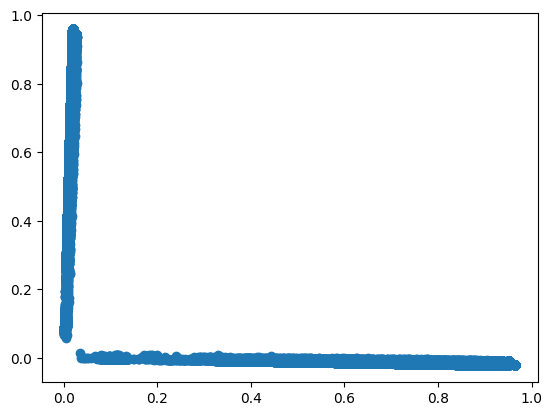

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assume `vector_20dim` is your 20-dimensional vector
svd = TruncatedSVD(n_components=2)
reduced_vector = svd.fit_transform(matrix)

# Plotting the 2D projection
plt.scatter(reduced_vector[:, 0], reduced_vector[:, 1])
plt.show()

In [15]:
from joblib import dump
import os

In [16]:
save_path = os.path.join('matrix_data', 'deckVectorizer_MIX_11k_30K.joblib')

In [37]:
dump(tfidf_vectorizer, save_path)

['matrix_data\\deckVectorizer_MIX_11k_30K.joblib']

In [38]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [39]:
deckVec = tfidf_vectorizer.fit_transform(deck_state)
deckVec = deckVec.toarray()

In [40]:
kmeans = KMeans(n_clusters=10, random_state=0,n_init= 10)
kmean = kmeans.fit_predict(deckVec)

In [41]:
from collections import Counter
Counter(kmean)

Counter({8: 5395,
         9: 5116,
         2: 4072,
         0: 3755,
         1: 2864,
         7: 2795,
         4: 2481,
         6: 1064,
         3: 996,
         5: 875})